In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
# importing pandas 
import pandas as pd

# using pandas read_csv function to load the dataset 
df = pd.read_csv("accident.csv") 

df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
df.shape

(12316, 32)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [16]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64


<Axes: xlabel='Accident_severity'>

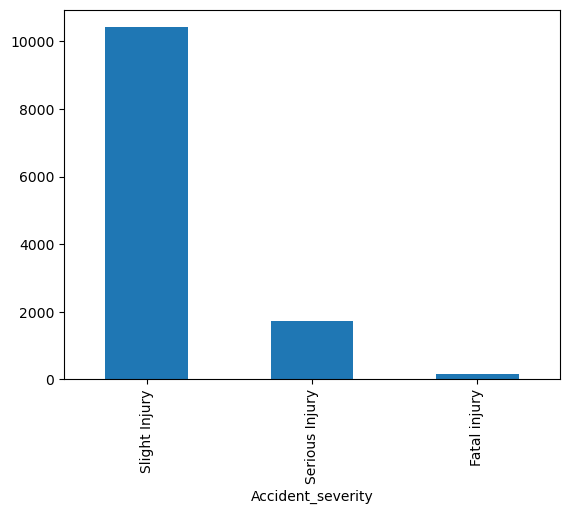

In [18]:
# target variable classes counts and bar plot
print(df['Accident_severity'].value_counts()) 
df['Accident_severity'].value_counts().plot(kind='bar')

Educational_level
Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: count, dtype: int64


<Axes: xlabel='Educational_level'>

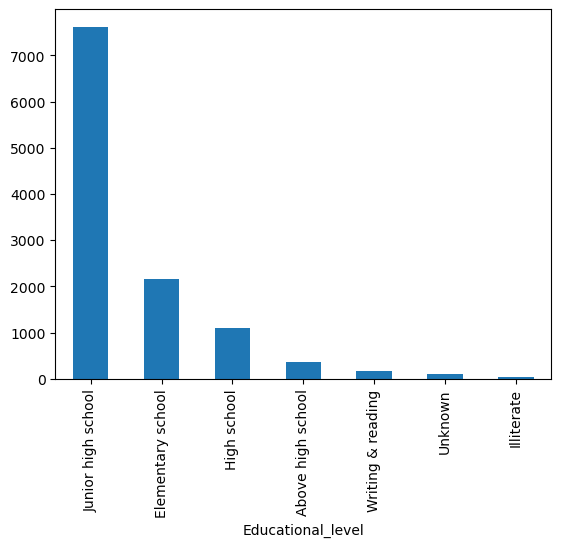

In [32]:
# Education levels of car drivers
print(df['Educational_level'].value_counts()) 
df['Educational_level'].value_counts().plot(kind='bar')

Road_surface_type
Asphalt roads                       11296
Earth roads                           358
Gravel roads                          242
Other                                 167
Asphalt roads with some distress       81
Name: count, dtype: int64


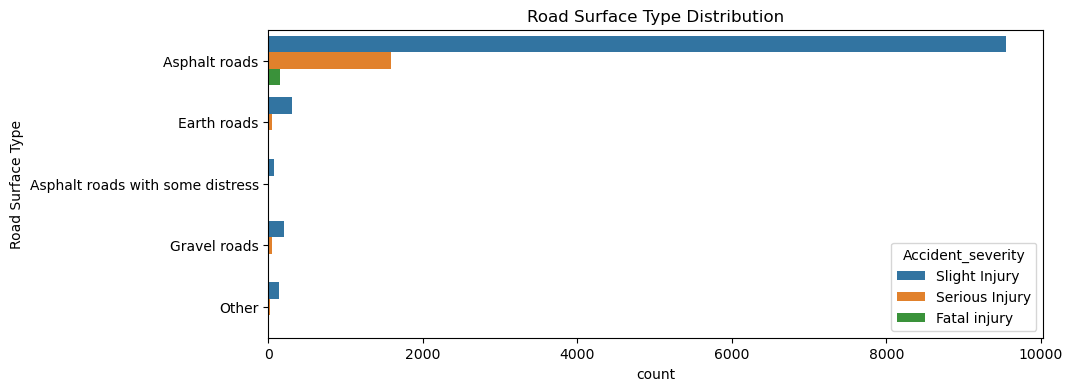

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns 

# plot the bar plot of road_surface_type and accident severity feature
print(df['Road_surface_type'].value_counts()) 

plt.figure(figsize = (10,4))
sns.countplot(y = "Road_surface_type", hue = "Accident_severity", data = df)
plt.title("Road Surface Type Distribution")
plt.ylabel("Road Surface Type")
plt.xticks(rotation = 0)
plt.show()

In [50]:
# convert object type column into datetime datatype column
df['Time'] = pd.to_datetime(df['Time'])

# Extrating 'Hour_of_Day' feature from the Time column
new_df = df.copy()
new_df['Hour_of_Day'] = df['Time'].dt.hour
new_df.drop('Time',axis=1,inplace=True)
new_df.head()

C:\Users\DELL INDIA\AppData\Local\Temp\ipykernel_19188\3699450808.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1


In [52]:
# import labelencoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# create labelencoder object
lb = LabelEncoder()
new_df['Accident_severity'] = lb.fit_transform(new_df['Accident_severity'])

new_df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,2,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,2,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,1,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,2,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,2,1


In [54]:
new_df['Accident_severity'].value_counts()

Accident_severity
2    10415
1     1743
0      158
Name: count, dtype: int64

In [56]:
from imblearn.over_sampling import RandomOverSampler

# Define X and y
X = new_df.drop(columns=['Accident_severity'])
y = new_df['Accident_severity']

# Resample the dataset
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [76]:
y_resampled.value_counts(), X_resampled.shape  # here we got all samples same

(Accident_severity
 2    10415
 1    10415
 0    10415
 Name: count, dtype: int64,
 (31245, 31))

In [60]:
# train/test/split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_resampled,
                                                 y_resampled,
                                                 test_size=0.2,
                                                random_state=42)

In [78]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Define the strategies for each column
strategies = {
    3: 'most_frequent',   # Educational_level
    4: 'most_frequent',   # Vehicle_driver_relation
    5: 'most_frequent',   # Driving_experience
    6: 'most_frequent',   # Type_of_vehicle
    8: 'constant',        # Service_year_of_vehicle
    9: 'constant',        # Defect_of_vehicle
    10: 'most_frequent',  # Area_accident_occured
    11: 'most_frequent',  # Lanes_or_Medians
    12: 'most_frequent',  # Road_allignment
    13: 'most_frequent',  # Types_of_Junction
    14: 'most_frequent',  # Road_surface_type
    18: 'most_frequent',  # Type_of_collision
    21: 'most_frequent',  # Vehicle_movement
    26: 'most_frequent',  # Work_of_casuality
    27: 'most_frequent'   # Fitness_of_casuality
}

# Create a ColumnTransformer for data preprocessing
tf1 = ColumnTransformer([
    ('impute_educational_level', SimpleImputer(strategy=strategies[3]), [3]),
    ('impute_Vehicle_driver_relation', SimpleImputer(strategy=strategies[4]), [4]),
    ('impute_Driving_experience', SimpleImputer(strategy=strategies[5]), [5]),
    ('impute_Type_of_vehicle', SimpleImputer(strategy=strategies[6]), [6]),
    ('impute_Service_year_of_vehicle', SimpleImputer(strategy=strategies[8], fill_value='Unknown'), [8]),
    ('impute_Defect_of_vehicle', SimpleImputer(strategy=strategies[9], fill_value='Unknown'), [9]),
    ('impute_Area_accident_occured', SimpleImputer(strategy=strategies[10]), [10]),
    ('impute_Lanes_or_Medians', SimpleImputer(strategy=strategies[11]), [11]),
    ('impute_Road_allignment', SimpleImputer(strategy=strategies[12]), [12]),
    ('impute_Types_of_Junction', SimpleImputer(strategy=strategies[13]), [13]),
    ('impute_Road_surface_type', SimpleImputer(strategy=strategies[14]), [14]),
    ('impute_Type_of_collision', SimpleImputer(strategy=strategies[18]), [18]),
    ('impute_Vehicle_movement', SimpleImputer(strategy=strategies[21]), [21]),
    ('impute_Work_of_casuality', SimpleImputer(strategy=strategies[26]), [26]),
    ('impute_Fitness_of_casuality', SimpleImputer(strategy=strategies[27]), [27])
], remainder='passthrough')

In [80]:
# Encode Categorical column

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

object_columns_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

# Create a ColumnTransformer for one-hot encoding only object columns
tf2 = ColumnTransformer([
    (f'ohe_{col}', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), [col])
    for col in object_columns_indices
], remainder='passthrough')

# Apply the transformation
X_train_encoded = tf2.fit_transform(X_train)


In [82]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

tf3 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice() )  # give proper slicing
])

TypeError: slice expected at least 1 argument, got 0

In [84]:
# feature seleciton method using chi2 for categorical output, categorical input
from sklearn.feature_selection import SelectKBest, chi2

tf4 = SelectKBest(chi2, k=50)

In [88]:
# import the necessary library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score


tf5 = RandomForestClassifier()

In [90]:
# Construct the pipeline
from sklearn.pipeline import Pipeline
 
pipe = Pipeline([
    ('trf1', tf1),
    ('trf2', tf2),
    ('trf4', tf4),
    ('trf5', tf5)
])

# Train the pipeline
pipe.fit(X_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_educational_level',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [3]),
                                                 ('impute_Vehicle_driver_relation',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [4]),
                                                 ('impute_Driving_experience',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [5]),
                                                 ('impute_Type_of_vehicle',
                                                  SimpleImputer(stra...
                                                                sparse_output=False),
                                                  [26]),
                                                 ('ohe_27',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [27]),
                                                 ('ohe_28',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [28]),
                                                 ('ohe_29',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [29]), ...])),
                ('trf4',
                 SelectKBest(k=50,
                             score_func=<function chi2 at 0x000001D38100CC20>)),
                ('trf5', RandomForestClassifier())])

In [92]:
# Predict
y_pred = pipe.predict(X_test)
y_pred

array([1, 2, 2, ..., 0, 1, 2])

In [94]:
# Exploring the pipeline
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_educational_level',
                                  SimpleImputer(strategy='most_frequent'), [3]),
                                 ('impute_Vehicle_driver_relation',
                                  SimpleImputer(strategy='most_frequent'), [4]),
                                 ('impute_Driving_experience',
                                  SimpleImputer(strategy='most_frequent'), [5]),
                                 ('impute_Type_of_vehicle',
                                  SimpleImputer(strategy='most_frequent'), [6...
                                 ('impute_Road_surface_type',
                                  SimpleImputer(strategy='most_frequent'),
                                  [14]),
                                 ('impute_Type_of_collision',
                                  SimpleImputer(strategy='most_frequent'),
                                  [18]),
               

In [96]:
# Accuracy Score 

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9241478636581854

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Use DecisionTreeClassifier instead of RandomForestClassifier
tf5_dt = DecisionTreeClassifier()

# Construct the pipeline for Decision Tree
pipe_dt = Pipeline([
    ('trf1', tf1),  # Apply the ColumnTransformer for imputations
    ('trf2', tf2),  # Apply the ColumnTransformer for OneHotEncoding
    ('trf4', tf4),  # Any additional transformations (if applicable)
    ('trf5', tf5_dt)  # Apply Decision Tree classifier
])

# Train the pipeline
pipe_dt.fit(X_train, y_train)

# Predict using the Decision Tree pipeline
y_pred_dt = pipe_dt.predict(X_test)

# Check the performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

# Named steps in the pipeline
pipe_dt.named_steps


Decision Tree Accuracy: 0.9023843815010402


{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_educational_level',
                                  SimpleImputer(strategy='most_frequent'), [3]),
                                 ('impute_Vehicle_driver_relation',
                                  SimpleImputer(strategy='most_frequent'), [4]),
                                 ('impute_Driving_experience',
                                  SimpleImputer(strategy='most_frequent'), [5]),
                                 ('impute_Type_of_vehicle',
                                  SimpleImputer(strategy='most_frequent'), [6...
                                 ('impute_Road_surface_type',
                                  SimpleImputer(strategy='most_frequent'),
                                  [14]),
                                 ('impute_Type_of_collision',
                                  SimpleImputer(strategy='most_frequent'),
                                  [18]),
               

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Use LogisticRegression instead of RandomForestClassifier
tf5_lr = LogisticRegression()

# Construct the pipeline for Logistic Regression
pipe_lr = Pipeline([
    ('trf1', tf1),  # Apply the ColumnTransformer for imputations
    ('trf2', tf2),  # Apply the ColumnTransformer for OneHotEncoding
    ('trf4', tf4),  # Any additional transformations (if applicable)
    ('trf5', tf5_lr)  # Apply Logistic Regression classifier
])

# Train the pipeline
pipe_lr.fit(X_train, y_train)

# Predict using the Logistic Regression pipeline
y_pred_lr = pipe_lr.predict(X_test)

# Check the performance
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")

# Named steps in the pipeline
pipe_lr.named_steps


Logistic Regression Accuracy: 0.557369179068651


{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_educational_level',
                                  SimpleImputer(strategy='most_frequent'), [3]),
                                 ('impute_Vehicle_driver_relation',
                                  SimpleImputer(strategy='most_frequent'), [4]),
                                 ('impute_Driving_experience',
                                  SimpleImputer(strategy='most_frequent'), [5]),
                                 ('impute_Type_of_vehicle',
                                  SimpleImputer(strategy='most_frequent'), [6...
                                 ('impute_Road_surface_type',
                                  SimpleImputer(strategy='most_frequent'),
                                  [14]),
                                 ('impute_Type_of_collision',
                                  SimpleImputer(strategy='most_frequent'),
                                  [18]),
               

In [102]:
# Classification report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2085
           1       0.85      0.95      0.90      2100
           2       0.95      0.82      0.88      2064

    accuracy                           0.92      6249
   macro avg       0.93      0.92      0.92      6249
weighted avg       0.93      0.92      0.92      6249



In [104]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[2085,    0,    0],
       [  22, 1998,   80],
       [  27,  345, 1692]], dtype=int64)

In [108]:
import pickle 
pickle.dump(pipe,open("10 pipe.pkl",'wb'))

In [110]:
pipe = pickle.load(open("10 pipe.pkl",'rb'))

In [112]:
import numpy as np

# record from X_test 10 row
print("Prediction :",pipe.predict(np.array(['Thursday', '31-50', 'Male', 'Junior high school', 'Owner', 'Unknown', 'Long lorry', 'Owner', 
                       'Unknown', 'Unknown', 'Other', 'Two-way (divided with solid lines road marking)',
                       'Tangent road with flat terrain','Unknown', 'Unknown', 'Dry', 'Daylight', 'Normal', 
                       'Collision with animals', 2, 1, 'Going straight', 'Driver or rider','Male', '18-30', 3, 'Driver',
                       'Normal', 'Not a Pedestrian', 'Changing lane to the left', 12,],dtype=object).reshape(1,-1)))
print("Actual :",y_test.iloc[10])

Prediction : [1]
Actual : 1


E:\AnacondaPython\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
E:\AnacondaPython\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
E:\AnacondaPython\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
E:\AnacondaPython\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
E:\AnacondaPython\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
E:\AnacondaPython\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with

In [114]:
def pred(Day_of_week, Age_band_of_driver, Sex_of_driver, Educational_level, Vehicle_driver_relation,
         Driving_experience, Type_of_vehicle, Owner_of_vehicle, Service_year_of_vehicle,
         Defect_of_vehicle, Area_accident_occured, Lanes_or_Medians, Road_allignment,
         Types_of_Junction, Road_surface_type, Road_surface_conditions, Light_conditions,
         Weather_conditions, Type_of_collision, Number_of_vehicles_involved,
         Number_of_casualties, Vehicle_movement, Casualty_class, Sex_of_casualty,
         Age_band_of_casualty, Casualty_severity, Work_of_casuality, Fitness_of_casuality,
         Pedestrian_movement, Cause_of_accident, Hour_of_Day):
    
    # Your prediction code here
    features = np.array([[Day_of_week, Age_band_of_driver, Sex_of_driver, Educational_level, Vehicle_driver_relation,
         Driving_experience, Type_of_vehicle, Owner_of_vehicle, Service_year_of_vehicle,
         Defect_of_vehicle, Area_accident_occured, Lanes_or_Medians, Road_allignment,
         Types_of_Junction, Road_surface_type, Road_surface_conditions, Light_conditions,
         Weather_conditions, Type_of_collision, Number_of_vehicles_involved,
         Number_of_casualties, Vehicle_movement, Casualty_class, Sex_of_casualty,
         Age_band_of_casualty, Casualty_severity, Work_of_casuality, Fitness_of_casuality,
         Pedestrian_movement, Cause_of_accident, Hour_of_Day]])
    
    results = pipe.predict(features)
    return results


In [116]:
predicted_class = pred(Day_of_week="Thursday", 
                                Age_band_of_driver='31-50',
                                Sex_of_driver='Male',
                                Educational_level='Junior high school',
                                Vehicle_driver_relation='Owner',
                                Driving_experience=None,
                                Type_of_vehicle='Long lorry',
                                Owner_of_vehicle='Owner',
                                Service_year_of_vehicle='Unknown',
                                Defect_of_vehicle=None,
                                Area_accident_occured='Other',
                                Lanes_or_Medians='Two-way (divided with solid lines road marking)',
                                Road_allignment='Tangent road with flat terrain',
                                Types_of_Junction=None,
                                Road_surface_type=None,
                                Road_surface_conditions='Dry',
                                Light_conditions='Daylight',
                                Weather_conditions='Normal',
                                Type_of_collision='Collision with animals',
                                Number_of_vehicles_involved=2,
                                Number_of_casualties=1,
                                Vehicle_movement='Going straight',
                                Casualty_class='Driver or rider',
                                Sex_of_casualty='Male',
                                Age_band_of_casualty='18-30',
                                Casualty_severity=3,
                                Work_of_casuality='Driver',
                                Fitness_of_casuality='Normal',
                                Pedestrian_movement='Not a Pedestrian',
                                Cause_of_accident='Changing lane to the left',
                                Hour_of_Day=12)

if predicted_class[0] == 2:
    print("Slight Injury.....")
elif predicted_class[0] == 1:
    print("Serious Injury")
else:
    print("Fatal Injury")

Serious Injury


E:\AnacondaPython\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
E:\AnacondaPython\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
E:\AnacondaPython\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
E:\AnacondaPython\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
E:\AnacondaPython\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
E:\AnacondaPython\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with

In [118]:
# test 2
predicted_class = pred(Day_of_week="Friday", 
                       Age_band_of_driver='31-50',
                       Sex_of_driver='Male',
                       Educational_level='Elementary school',
                       Vehicle_driver_relation='Employee',
                       Driving_experience='1-2yr',
                       Type_of_vehicle='Lorry (41?100Q)',
                       Owner_of_vehicle='Owner',
                       Service_year_of_vehicle=None,
                       Defect_of_vehicle='No defect',
                       Area_accident_occured='Office areas',
                       Lanes_or_Medians='Two-way (divided with broken lines road marking)',
                       Road_allignment='Tangent road with flat terrain',
                       Types_of_Junction='Y Shape',
                       Road_surface_type='Asphalt roads',
                       Road_surface_conditions='Dry',
                       Light_conditions='Daylight',
                       Weather_conditions='Normal',
                       Type_of_collision='Vehicle with vehicle collision',
                       Number_of_vehicles_involved=2,
                       Number_of_casualties=2,
                       Vehicle_movement='Going straight',
                       Casualty_class='na',
                       Sex_of_casualty='na',
                       Age_band_of_casualty='na',
                       Casualty_severity='na',
                       Work_of_casuality='Driver',
                       Fitness_of_casuality='Normal',
                       Pedestrian_movement='Not a Pedestrian',
                       Cause_of_accident='Changing lane to the left',
                       Hour_of_Day=1)

if predicted_class[0] == 2:
    print("Slight Injury")
elif predicted_class[0] == 1:
    print("Serious Injury")
else:
    print("Fatal Injury")

Slight Injury


E:\AnacondaPython\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
E:\AnacondaPython\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
E:\AnacondaPython\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
E:\AnacondaPython\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
E:\AnacondaPython\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
E:\AnacondaPython\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with